# Data Analysis for "bank_transactions_data" from Kaggle
Daniel Benavides, Universidad de los Andes

In [2]:
# Data extraction libraries
import numpy as np
import pandas as pd

# Data visualizaton libraries 
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"
import altair as alt

In [3]:
from matplotlib import font_manager

plt.rcParams['font.family'] = 'Arial'

### Data Analysis

In [4]:
# Load the dataset
df = pd.read_csv("bank_transactions_data_2.csv")
df.head()

TransactionID AccountID  TransactionAmount   TransactionDate  \
0      TX000001   AC00128              14.09   4/11/2023 16:29   
1      TX000002   AC00455             376.24   6/27/2023 16:44   
2      TX000003   AC00019             126.29   7/10/2023 18:16   
3      TX000004   AC00070             184.50    5/5/2023 16:32   
4      TX000005   AC00411              13.45  10/16/2023 17:51   

  TransactionType                 Location           State DeviceID  \
0           Debit                San Diego      California  D000380   
1           Debit                  Houston           Texas  D000051   
2           Debit            Mesa, Arizona         Arizona  D000235   
3           Debit  Raleigh, North Carolina  North Carolina  D000187   
4          Credit                  Atlanta         Georgia  D000308   

       IP Address MerchantID Channel  CustomerAge CustomerOccupation  \
0  162.198.218.92       M015     ATM           70             Doctor   
1     13.149.61.4       M052     ATM           68             Doctor   
2  215.97.143.157       M009  Online           19            Student   
3  200.13.225.150       M002  Online           26            Student   
4    65.164.3.100       M091  Online           26            Student   

   TransactionDuration  LoginAttempts  AccountBalance PreviousTransactionDate  \
0                   81              1         5112.21          11/4/2024 8:08   
1                  141              1        13758.91          11/4/2024 8:09   
2                   56              1         1122.35          11/4/2024 8:07   
3                   25              1         8569.06          11/4/2024 8:09   
4                  198              1         7429.40          11/4/2024 8:06   

   TransactionMonth  TransactionDay  
0                 4              11  
1                 6              27  
2                 7              10  
3                 5               5  
4                10              16

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   State                    2512 non-null   object 
 7   DeviceID                 2512 non-null   object 
 8   IP Address               2512 non-null   object 
 9   MerchantID               2512 non-null   object 
 10  Channel                  2512 non-null   object 
 11  CustomerAge              2512 non-null   int64  
 12  CustomerOccupation       2512 non-null   object 
 13  TransactionDuration      2512 non-null   int64  
 14  LoginAttempts           

TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  TransactionMonth  TransactionDay  
count     2512.000000        2512.00000     2512.000000  
mean      5114.302966           6.56250       15.827229  
std       3900.942499           3.47559        8.761293  
min        101.250000           1.00000        1.000000  
25%       1504.370000           3.00000        8.000000  
50%       4735.510000           7.00000       16.000000  
75%       7678.820000          10.00000       24.000000  
max      14977.990000          12.00000       31.000000

#### Exploratory Analysis of transaction type

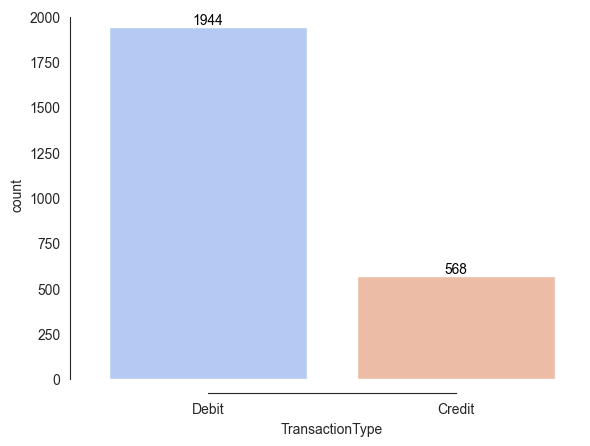

In [6]:
sns.set_style("white")

# Barplot of transactions by type (TransactionType)
ax = sns.countplot(x="TransactionType", data=df, hue="TransactionType", palette="coolwarm")
sns.despine(offset=10, trim=True)

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

### Exploratory Analysis of customer transactions

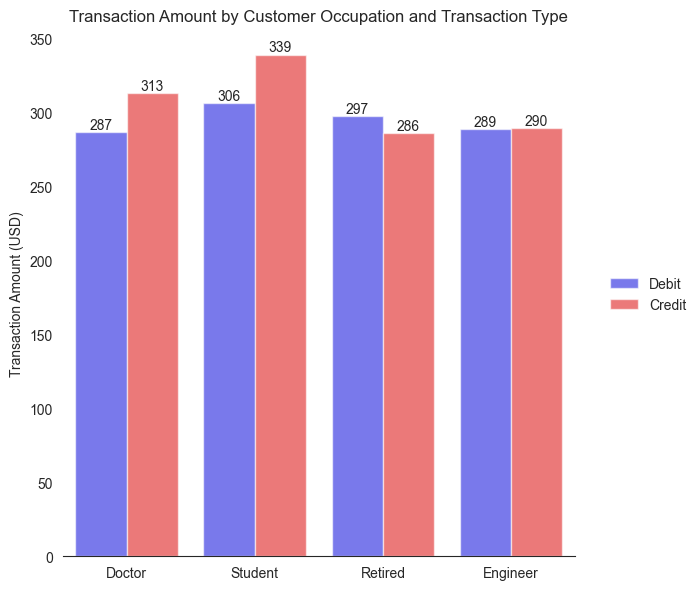

In [7]:
# Customer occupation (CustomerOccupation) and transaction type (TransactionType)
g = sns.catplot(
    data=df, kind="bar",
    x="CustomerOccupation", y="TransactionAmount", hue="TransactionType",
    errorbar=None, palette=["b", "r"], alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Transaction Amount (USD)")
g.legend.set_title("")
plt.title("Transaction Amount by Customer Occupation and Transaction Type")

for ax in g.axes.flat:
    for c in ax.containers:
        labels = [f'{v.get_height():.0f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', fontsize=10)

Text(0.5, 1.0, 'Transaction Amount vs. Customer Age by Customer Occupation')

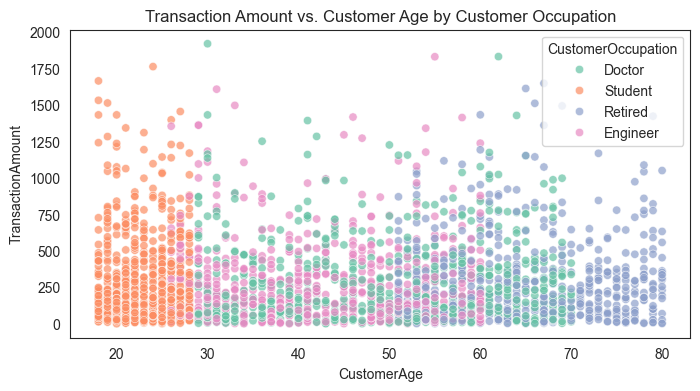

In [8]:
# Scatterplot of transaction amount (TransactionAmount) vs. customer age (CustomerAge) by customer occupation (CustomerOccupation)
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x="CustomerAge", y="TransactionAmount", hue="CustomerOccupation", palette="Set2", alpha=0.7)
plt.title("Transaction Amount vs. Customer Age by Customer Occupation")

In [9]:
# PLOTLY Customer occupation (CustomerOccupation) and transaction type (TransactionType)
fig = px.box(df, x="CustomerOccupation", y="TransactionAmount", color = "TransactionType")
fig.update_traces(quartilemethod="exclusive") 
fig.show()

In [21]:
# Transaction amount vs. different features
brush = alt.selection_interval(resolve='global')

base = alt.Chart(df).mark_point().encode(
    y='TransactionAmount',
    color=alt.when(brush).then("CustomerOccupation").otherwise(alt.ColorValue("gray")),
).add_params(
    brush
).properties(
    width=250,
    height=250
)

base.encode(x='TransactionDuration') | base.encode(x='AccountBalance') | base.encode(x='CustomerAge')

alt.HConcatChart(...)

#### Exploratory Analysis of transactions by city and state

In [11]:
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')
state_counts = df.groupby("State").size().reset_index(name="transactions")
state_names = data.population_engineers_hurricanes()[["state", "id"]].drop_duplicates()
state_data = pd.merge(state_names, state_counts, left_on="state", right_on="State", how="left").fillna(0)

alt.Chart(states).mark_geoshape().encode(
    color="transactions:Q",
    tooltip=["state:N", "transactions:Q"]
).transform_lookup(
    lookup="id",
    from_=alt.LookupData(state_data, "id", ["state", "transactions"])
).project(
    type="albersUsa"
).properties(
    width=500,
    height=300,
    title="Number of Transactions per State"
)

alt.Chart(...)

### Exploratory Analysis of transaction amounts by date

Text(0.5, 1.0, 'Heatmap of Number of Transactions by Day and Month')

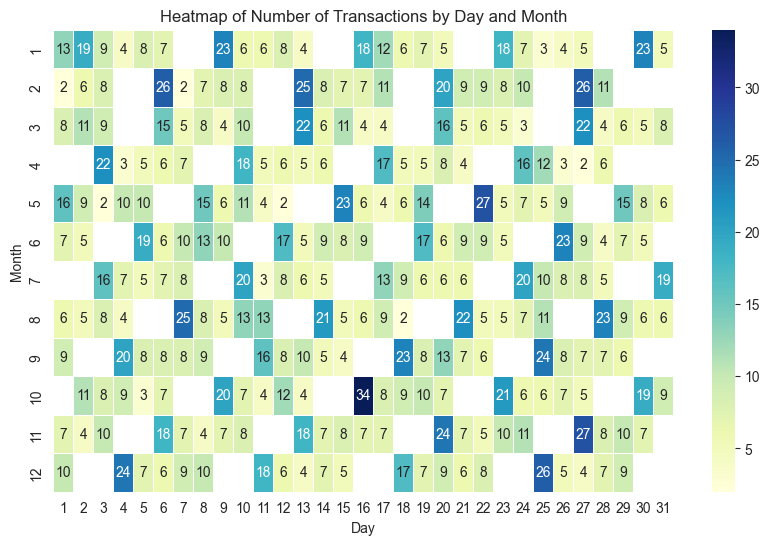

In [12]:
# Heatmap of number of transactions by day and month
df_temp = df.copy()
df_temp['count'] = 1
date_heatmap = df_temp.pivot_table(index="TransactionMonth", 
                                   columns="TransactionDay", 
                                   values="count", 
                                   aggfunc='sum')
f, ax = plt.subplots(figsize=(10,6)) 
sns.heatmap(date_heatmap, annot=True, fmt=".0f", linewidths=.5, ax=ax, cmap="YlGnBu")
plt.xlabel("Day")
plt.ylabel("Month")
plt.title("Heatmap of Number of Transactions by Day and Month")

Text(0.5, 1.0, 'Heatmap of Transaction Amount in Thousands by Day and Month')

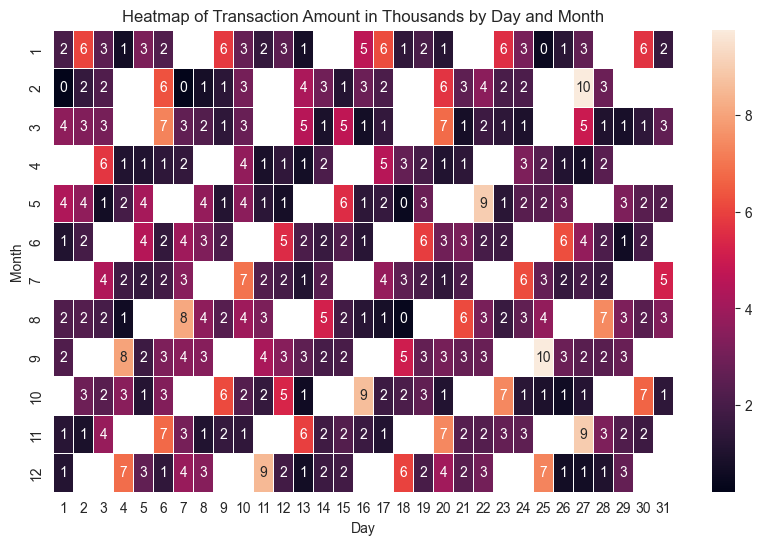

In [13]:
# Heatmap of transaction amount (TransactionAmount) in thousands by day and month
df_temp = df.copy()
df_temp['amount'] = df_temp['TransactionAmount'] / 1000
amount_heatmap = df_temp.pivot_table(index="TransactionMonth", 
                                     columns="TransactionDay", 
                                     values="amount", 
                                     aggfunc='sum')
f, ax = plt.subplots(figsize=(10,6))
sns.heatmap(amount_heatmap, annot=True, fmt=".0f", linewidths=.5, ax=ax, cmap="rocket")
plt.xlabel("Day")
plt.ylabel("Month")
plt.title("Heatmap of Transaction Amount in Thousands by Day and Month")

### Exploratory Analysis of channels by transaction type 

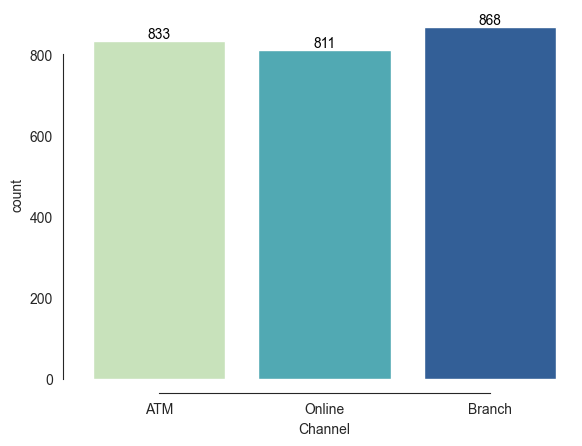

In [14]:
sns.set_style("white")

# Barplot of transactions by type (TransactionType)
ax = sns.countplot(x="Channel", data=df, hue="Channel", palette="YlGnBu")
sns.despine(offset=10, trim=True)

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

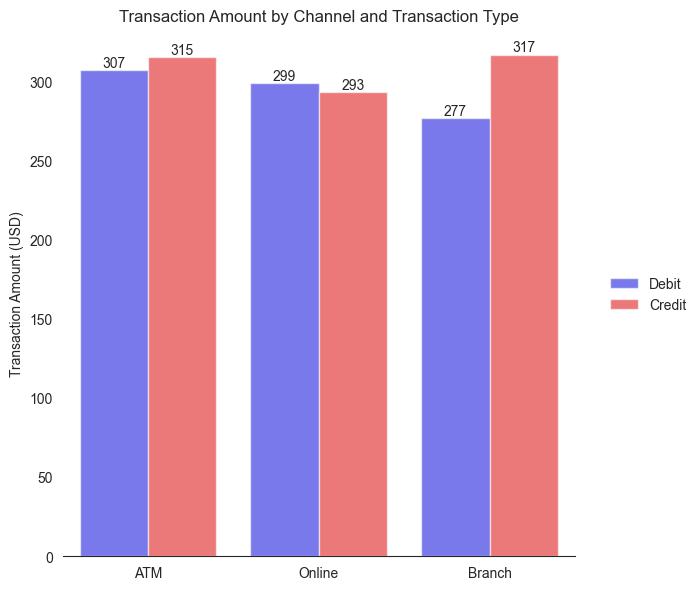

In [ ]:
# Barplot of channel (Channel) and transaction type (TransactionType)
g = sns.catplot(
    data=df, kind="bar",
    x="Channel", y="TransactionAmount", hue="TransactionType",
    errorbar=None, palette=["b", "r"], alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Transaction Amount (USD)")
g.legend.set_title("")
plt.title("Transaction Amount by Channel and Transaction Type")

for ax in g.axes.flat:
    for c in ax.containers:
        labels = [f'{v.get_height():.0f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', fontsize=10)

Text(0, 0.5, 'Transaction Amount ($)')

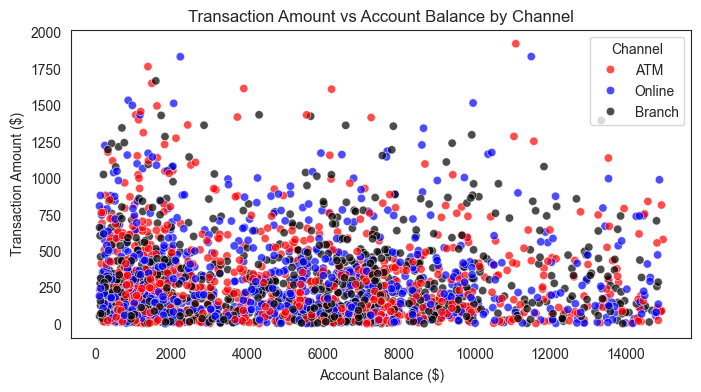

In [16]:
# Transaction Amount vs Account Balance, colored by Channel
custom_palette = {
    'ATM': 'red',
    'Online': 'blue', 
    'Branch': 'black'  # Replace with your actual channel names
}

plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x="AccountBalance", y="TransactionAmount", 
                hue="Channel", palette=custom_palette, alpha=0.7)
plt.title("Transaction Amount vs Account Balance by Channel")
plt.xlabel("Account Balance ($)")
plt.ylabel("Transaction Amount ($)")

Text(0, 0.5, 'Transaction Amount ($)')

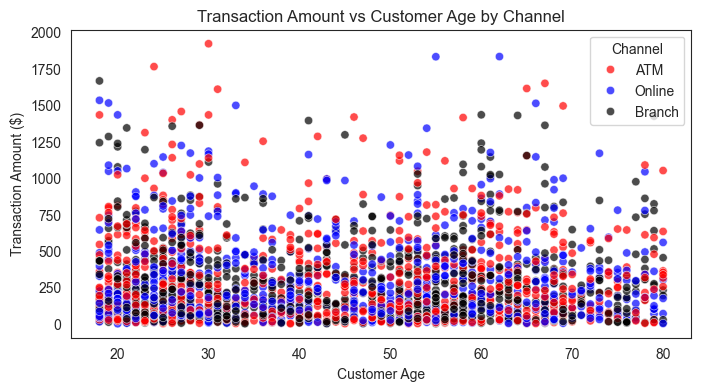

In [17]:
# Transaction Amount vs Customer Age, colored by Channel
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x="CustomerAge", y="TransactionAmount", 
                hue="Channel", palette=custom_palette, alpha=0.7)
plt.title("Transaction Amount vs Customer Age by Channel")
plt.xlabel("Customer Age")
plt.ylabel("Transaction Amount ($)")

Text(0, 0.5, 'Transaction Amount ($)')

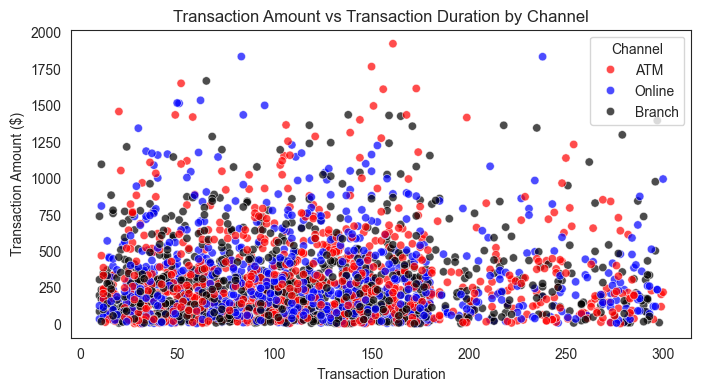

In [18]:
# Transaction Amount vs Transaction Duration, colored by Channel
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x="TransactionDuration", y="TransactionAmount", 
                hue="Channel", palette=custom_palette, alpha=0.7)
plt.title("Transaction Amount vs Transaction Duration by Channel")
plt.xlabel("Transaction Duration")
plt.ylabel("Transaction Amount ($)")

In [19]:
# Transaction amount vs. different features
brush = alt.selection_interval(resolve='global')

base = alt.Chart(df).mark_point().encode(
    y='TransactionAmount',
    color=alt.when(brush).then("Channel").otherwise(alt.ColorValue("gray")),
).add_params(
    brush
).properties(
    width=250,
    height=250
)

base.encode(x='TransactionDuration') | base.encode(x='AccountBalance') | base.encode(x='CustomerAge')

alt.HConcatChart(...)